In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import spicy as sp
import pandas as pd
import sklearn
#import MrJob
import numpy as np
import pandas as pd
import requests
import io
import zipfile
import scipy.stats
from matplotlib import rcParams
#from pattern import web
from fnmatch import fnmatch
from math import *
from pylab import *
from scipy.optimize import brentq
from scipy.misc import derivative

In [4]:
# Bisection method to find roots
def root_bisection(f,a,b,tol=1.0e-6):
    dx=abs(b-a)
    while dx>tol:
        x=(a+b)/2.0
        if (f(a)*f(b))<0:
            b=x
        else:
            a=x
        dx=abs(b-a)
    return x

In [8]:
root_bisection(cos,0,pi)

1.57079557778084

In [14]:
#inbuilt module to find roots
x=brentq(sin,2,4)
print x, x-pi

3.14159265359 0.0


In [99]:
#  3 integration routines, easy to write, just look at the final formula
#  break it into parts and write each part separately.
def int_simple(fn,a,b,n):
    I=0
    dx=(b-a)/float(n)
    for i in range(1,n):
        x=a+dx*i
        I=I+fn(x)*dx
    return I

def int_trapezoidal(fn,a,b,n):
    dx=(b-a)/float(n)
    I=0.5*(fn(a)+fn(b))
    for i in range(1,n-1):
        I += fn(a+i*dx)  
    return I*dx
# Something wrong with Simpson !!
def int_simpson(fn,a,b,n):
    dx=(b-a)/float(n)
    I2=0.0;I3=0.0
    I1=fn(a)+fn(b)
    for i in range(1,n/2):
        I2=4*fn(a+(2*i-1)*dx)
    for i in range(1,(n/2)-1):
        I3=2*fn(a+2*dx*i)
    return 0.33*dx*(I1+I2+I3)

In [100]:
def g(x):
    return x**4-2*x+1
print int_simpson(g,0,2,100),int_trapezoidal(g,0,2,100), int_simple(g,0,2,100)

0.532209676416 4.1528759328 4.261066656


In [101]:
def g(x):
    return cos(x)
print int_simpson(g,0,pi/2,100),int_trapezoidal(g,0,pi/2,100), int_simple(g,0,pi/2,100)

0.0068113224981 0.999732708276 0.992125456606


In [102]:
def g(x):
    return 1/x**2
print int_simpson(g,1,3,100),int_trapezoidal(g,1,3,100), int_simple(g,1,3,100)

0.0112024157956 0.663367596973 0.655619747777


In [103]:
def g(x):
    return x**2+x+1
print int_simpson(g,2,4,100),int_trapezoidal(g,2,4,100), int_simple(g,2,4,100)

0.99281952 26.250392 26.3868


In [105]:
# Fresnel cosine integral in optics
def g(x):
    return cos(pi/2*x**2)
print int_simpson(g,0,6.9,100),int_trapezoidal(g,0,6.9,100), int_simple(g,0,6.9,100)

0.114752237544 0.513256312585 0.415645492683


In [132]:
#Q6 FD didtribution: Find mu ??? egg chick problem, need mu to solve intergral 
# and solve intergral to get mu.
def g(E):
    return 1/(exp((E-0.000001)/0.025)+1)
#def g(E):
#    return E-0.025*ln((1/f)-1) 
print int_trapezoidal(g,0,2,100)
    

0.0176643490408


In [119]:
print derivative(sin, pi, dx=0.1)

-0.998334166468


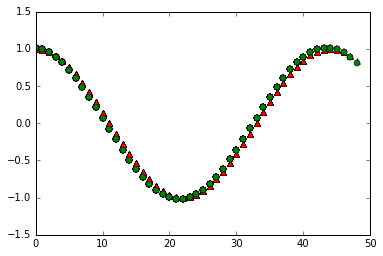

In [23]:
#Q7 Differential of sin vs cos
p=[]
diff=[]
cs=[]
for x in np.linspace(0,7,50):    
    p.append(x)
for i in range(0,49):
    y=(sin(p[i+1])-sin(p[i]))/0.14
    diff.append(y)
    #plt.plot(p,diff,'r^')
    z=cos(p[i])
    cs.append(z)
    plt.plot(cs,'r^')
    plt.plot(diff,'go')

In [ ]:
# Q4 Solve double integral